In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from PIL import Image

## Loading Images into a list

In [3]:


def load_images_from_directory(directory, label):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
            filepath = os.path.join(directory, filename)
            image = Image.open(filepath)
            images.append((image, label))
    return images

normal_images = load_images_from_directory("image_files/normal","normal")
abnormal_images = load_images_from_directory("image_files/abnormal", "abnormal")
images = normal_images + abnormal_images

# Just making sure the dimension of each image



## Visualizing an image from the list


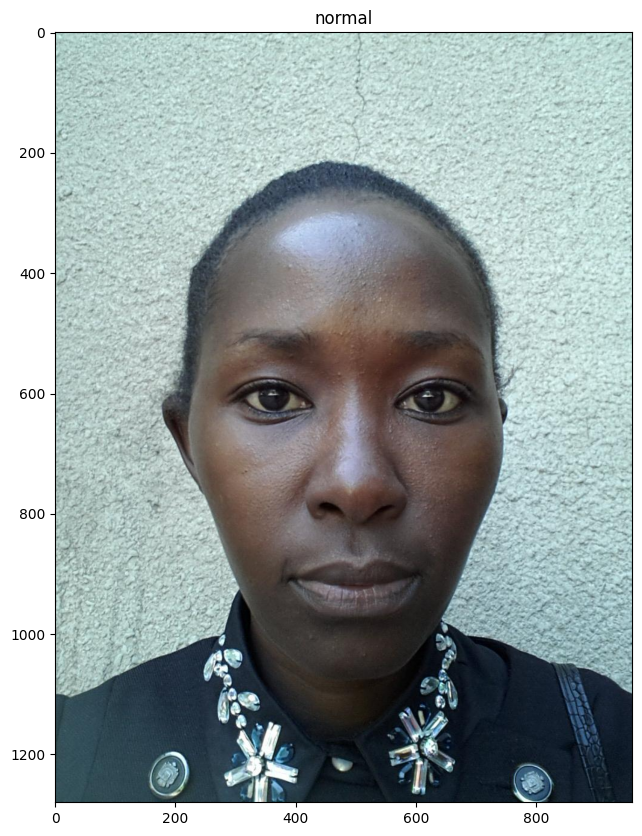

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(images[0][0])
plt.title(images[0][1])
plt.show()


## Detect only the face in each picture for the purpose of cropping out the background as it's going to mess with the metrics that I will be going to use.


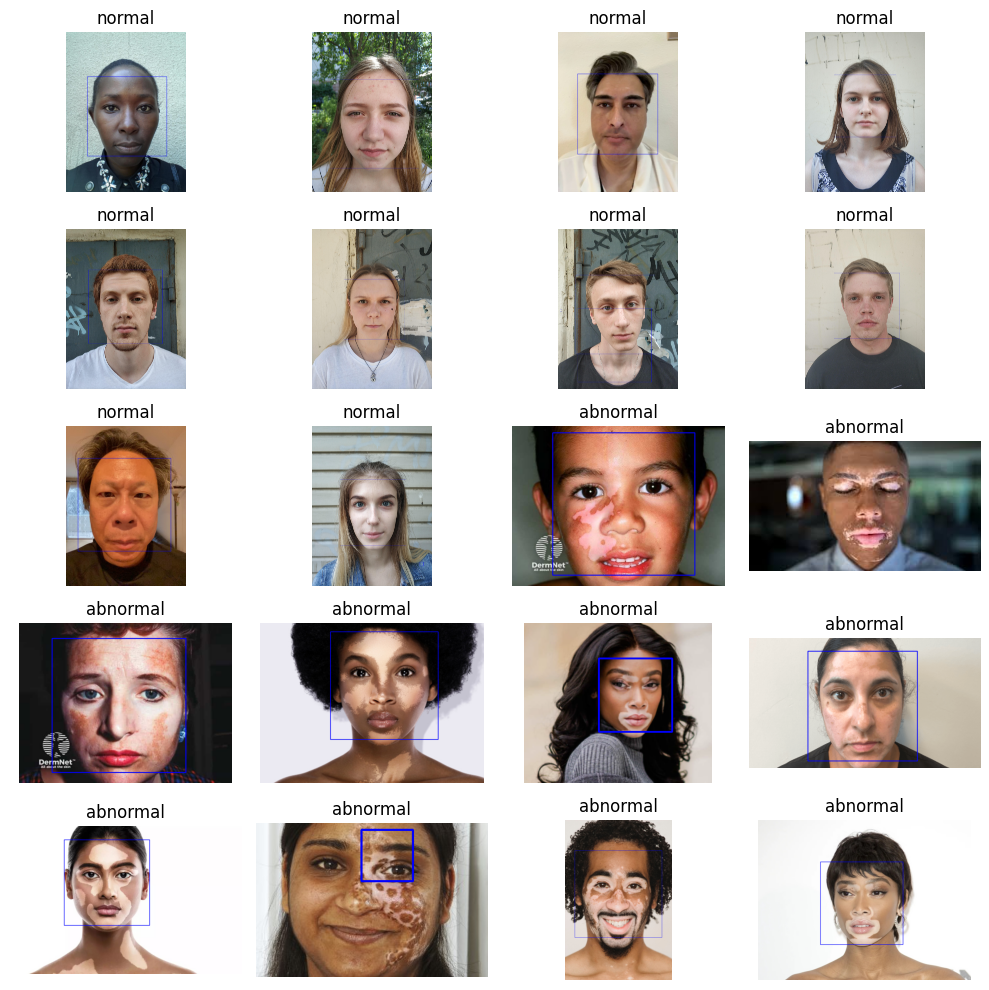

In [5]:



def detect_and_segment_face(pil_image):

    if pil_image is None:
        raise ValueError("Invalid PIL image")

    # PIL Image to RGB np array
    image_array = np.array(pil_image)
    
    # RGB to BGR
    image_bgr = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    # BGR image to grayscale
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    # Load pre-trained Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in grayscale and draw rectangles around each face
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # back to RGB for visualization
    final_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return Image.fromarray(final_rgb), faces

#visualize
plt.figure(figsize=(10, 10))
for i in range(20):  
    ax = plt.subplot(5, 4, i + 1) 
    pil_image = images[i][0]  
    plt.title(images[i][1])  
    segmented_image, detected_faces = detect_and_segment_face(pil_image)
    plt.imshow(segmented_image)
    plt.axis('off')

plt.tight_layout()
plt.show()  # Display 


In [6]:
coord = []

## The previous method which was Haar Cascade didn't work so I had to use mtcnn in order to draw boxes just around the face. It works with MTCNN but the visualization doesn't show below since I want the RGB box to be taken off for doing kmean clustering purpose

In [7]:

import tensorflow.keras

In [8]:

from mtcnn import MTCNN


def detect_and_segment_face_mtcnn(pil_image):
    if pil_image is None:
        raise ValueError("Invalid PIL image")

    # Change to PIL Image to RGB np array
    image_array = np.array(pil_image.convert('RGB'))

    # array is contiguous and of type uint8
    if not image_array.flags['C_CONTIGUOUS']:
        image_array = np.ascontiguousarray(image_array)
    if image_array.dtype != np.uint8:
        image_array = image_array.astype(np.uint8)

    # MTCNN face detector and detect faces
    detector = MTCNN()
    results = detector.detect_faces(image_array)

    # draw rectangles around each face but it won't be drawn since I commented it out
    for result in results:
        x, y, width, height = result['box']
        coord.append((x,y,width,height))
#        cv2.rectangle(image_array, (x, y), (x + width, y + height), (255, 0, 0), 8)

    # numpy array to PIL Image
    final_image = Image.fromarray(image_array)
    return final_image, results



 

## Below is the images detected with mtcnn, again, you won't see the bounding box because I take it off for calculating metrics purpose however the bounding boxes work

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━

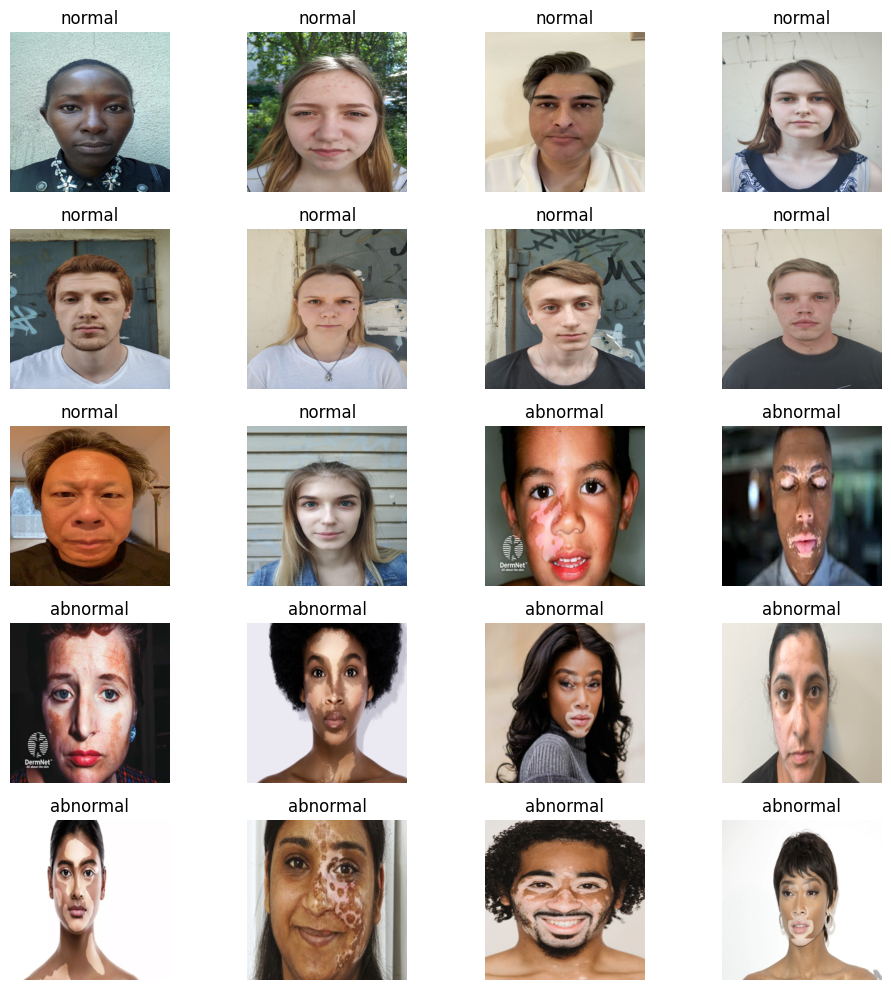

(20, 256, 256, 3)


In [9]:
    
standard_size = (256, 256) # to have the same size for each image

# store cropped images
segmented_images = []


plt.figure(figsize=(10, 10))
for i in range(20):  
    ax = plt.subplot(5, 4, i + 1)
    pil_image = images[i][0]  # Assume the first element is the PIL Image
    plt.title(images[i][1])  # Display the label

    # Resize the image for uniformity
    resized_image = pil_image.resize(standard_size)
    segmented_image, detected_faces = detect_and_segment_face_mtcnn(resized_image)
    segmented_images.append(segmented_image)
    
    # Display 
    plt.imshow(segmented_image)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Convert to np
segmented_images_array = np.array([np.array(img) for img in segmented_images])

# Check the shape
print(segmented_images_array.shape)

## Visualize one picture just to make sure how if it's cropped

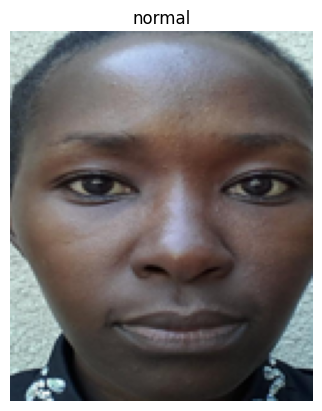

In [10]:

from sklearn.cluster import KMeans



def extract_face_region(image_array, box):
    x, y, width, height = box
    return image_array[y:y+height, x:x+width,:]


# extract the face of first image
face_region = extract_face_region(segmented_images_array[0], coord[0]) 

#display
plt.imshow(face_region)
plt.axis('off')  
plt.title(images[0][1])
plt.show()



## Display Everything

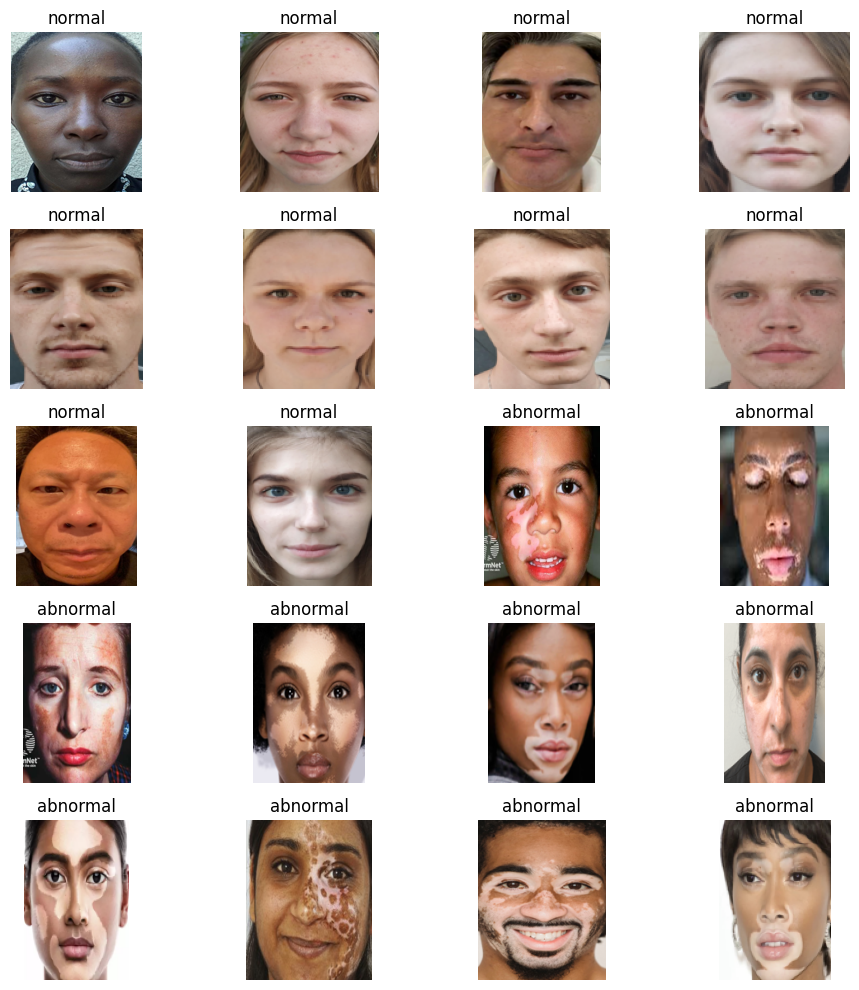

In [11]:
extracted_face_images = []

plt.figure(figsize=(10, 10))
for i in range(20):  # Ensure you don't exceed the number of available images
    ax = plt.subplot(5, 4, i + 1)  # Adjust the grid size if different from number of images
    plt.title(images[i][1])  # Display the label
    extracted_face_image = extract_face_region(segmented_images_array[i], coord[i])
    extracted_face_images.append((extracted_face_image, images[i][1]))
    plt.imshow(extracted_face_image)
    plt.axis('off')

plt.tight_layout()  # Adjust layout to handle overlapping
plt.show()  # Display all subplots in one figure



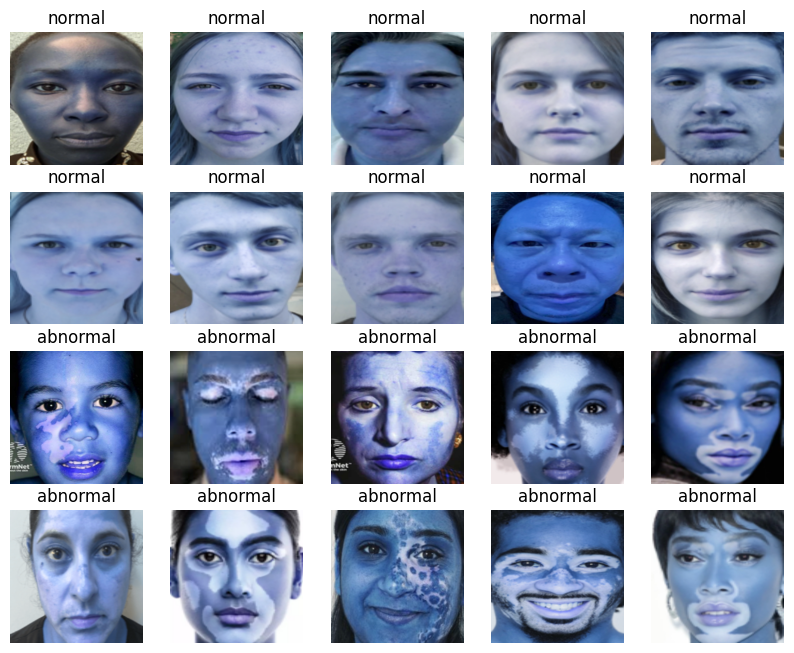

In [12]:



def convert_rgb_to_lab(rgb_image, target_size=(256, 256)):

    bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
    # Resize the image
    bgr_image_resized = cv2.resize(bgr_image, target_size)
    lab_image = cv2.cvtColor(bgr_image_resized, cv2.COLOR_BGR2Lab)

    l,a,b = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    normalized = cv2.merge((l, a, b))
    return cv2.cvtColor(normalized, cv2.COLOR_LAB2BGR)
    # Optionally convert back to a PIL Image
    #lab_pil_image = Image.fromarray(lab_image, 'LAB')
    
#    return lab_image


    

# convert the images to lab
lab_images = [convert_rgb_to_lab(image) for image,label in extracted_face_images]



plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(lab_images[i])
    plt.title(images[i][1])  
    plt.axis('off')
plt.show()


## The following part uses K-mean clusters to each image
## The reason for using k-mean is to group pixels within an image into a specified number k of clusters based on their color similarity

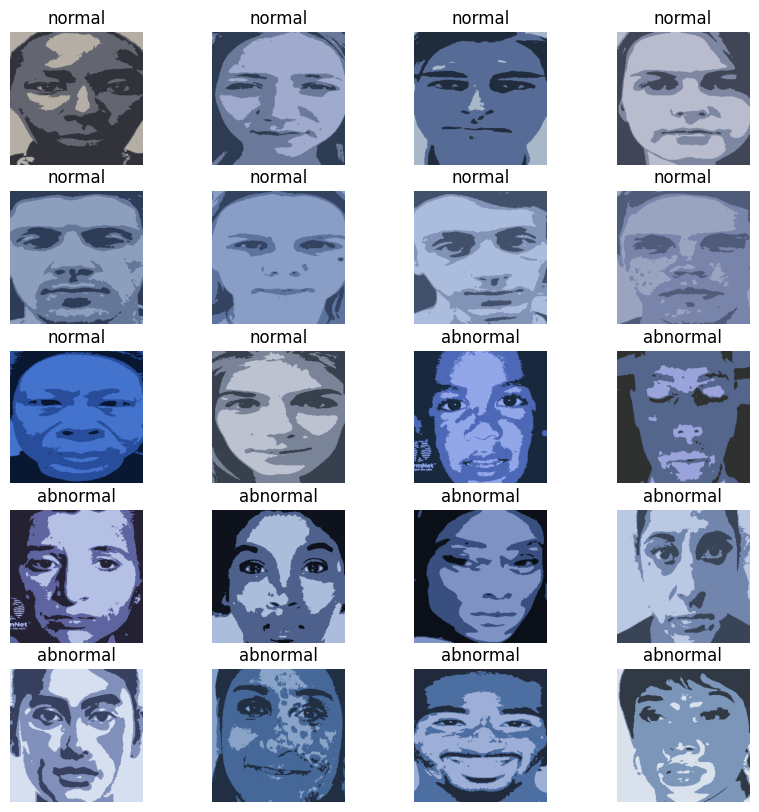

In [13]:
from sklearn.cluster import KMeans


def apply_kmeans_to_image(lab_image, n_clusters = 3):

    # flatten the image to shape 
    pixels = lab_image.reshape(-1, 3) # (num of pixels, channel LAB) 
    
    # apply K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(pixels)
    
    # get cluster centers
    dominant_colors = kmeans.cluster_centers_
    
    # replace each pixel with the nearest dominant clustercolor
    labels = kmeans.labels_
    segmented_image = dominant_colors[labels].reshape(lab_image.shape).astype(int)
    
    return kmeans, segmented_image

kmeans_results = []
segmented_images = []

for lab_image in lab_images:
    kmeans, segmented = apply_kmeans_to_image(lab_image)
    kmeans_results.append(kmeans)
    segmented_images.append(segmented)
# now kmeans_results has the K-means model for each image,
# and segmented_images has the LAB images where each pixel is replaced with its dominant cluster color.



# display
plt.figure(figsize=(10, 10))
for i, image in enumerate(segmented_images[:20]):  # Displaying the first 20 segmented images
    plt.subplot(5, 4, i + 1)
    plt.imshow(image)
    plt.title(images[i][1])
    plt.axis('off')
plt.show()


In [14]:


def calculate_biomarkers(dominant_colors, cluster_percentage):
    # biomarker based on the variance of color distribution
    color_variance = np.var(cluster_percentage) 
    
    # biomarker based on the standard deviation of the lightness of colors
    # extract (L channel) 
    lightness_values = [color[0] for color in dominant_colors]  
    lightness_sd = np.std(lightness_values)
    
    # another biomarker based on the entropy of color distribution
    color_entropy = -np.sum(cluster_percentage * np.log2(cluster_percentage)) if np.all(cluster_percentage != 0) else 0  # handle log(0) case
    
    return {
        'Color Variance': color_variance,
        'Lightness Standard Deviation': lightness_sd,
        'Color Entropy': color_entropy
    }



biomarkers_results = []

for kmeans in kmeans_results:
    # get the cluster centers, dominant colors in LAB
    dominant_colors = kmeans.cluster_centers_
    # calculate the cluster percentages
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    cluster_percentage = counts / counts.sum()
    
    # calculate the biomarkers
    biomarkers = calculate_biomarkers(dominant_colors, cluster_percentage)
    biomarkers_results.append(biomarkers)

# display the biomarkers results
for biomarker in biomarkers_results[:20]:
    print(biomarker)






{'Color Variance': 0.009838680478019847, 'Lightness Standard Deviation': 53.71674415527945, 'Color Entropy': 1.5148881444241955}
{'Color Variance': 0.009311148948553534, 'Lightness Standard Deviation': 46.371703008904994, 'Color Entropy': 1.5207333632987254}
{'Color Variance': 0.07708450101522936, 'Lightness Standard Deviation': 56.111529469520335, 'Color Entropy': 1.0957589013073736}
{'Color Variance': 0.017731528160058792, 'Lightness Standard Deviation': 49.32367747784981, 'Color Entropy': 1.4768050172666247}
{'Color Variance': 0.014445392156226767, 'Lightness Standard Deviation': 38.432302390566306, 'Color Entropy': 1.4923548439174041}
{'Color Variance': 0.07920320927061968, 'Lightness Standard Deviation': 35.44198003477924, 'Color Entropy': 1.102811971601988}
{'Color Variance': 0.014081728075527482, 'Lightness Standard Deviation': 43.17551066772121, 'Color Entropy': 1.4974733008961147}
{'Color Variance': 0.011929059763335519, 'Lightness Standard Deviation': 30.21047603192258, 'Colo

### Since the Color Variance and Color Entropy is the same throughout all images from the output above, I will be using different biomarkers
### However I will be still using Lightness Standard Deviation since it somewhat seperates it from the normal to abnormal
### Below I will be trying out the sd of L,A,B to see if I can use them as my metrics

In [15]:


def calculate_biomarkers(dominant_colors, cluster_percentage):
    # L channel sd
    lightness_values = [color[0] for color in dominant_colors]  
    lightness_sd = np.std(lightness_values)
    
    # mean and sd for A channel
    a_channel_values = [color[1] for color in dominant_colors]  
    a_mean = np.mean(a_channel_values)
    a_sd = np.std(a_channel_values)
    
    # mean and sd for B channel (
    b_channel_values = [color[2] for color in dominant_colors]  
    b_mean = np.mean(b_channel_values)
    b_sd = np.std(b_channel_values)
    
    return {
        'Lightness Standard Deviation': lightness_sd,
        'A Channel Mean': a_mean,
        'A Channel Standard Deviation': a_sd,
        'B Channel Mean': b_mean,
        'B Channel Standard Deviation': b_sd
    }
biomarkers_results = []

for kmeans in kmeans_results:
    # cluster centers
    dominant_colors = kmeans.cluster_centers_
    
    #cluster percentages
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    cluster_percentage = counts / counts.sum()
    
    # new biomarkers
    biomarkers = calculate_biomarkers(dominant_colors, cluster_percentage)
    biomarkers_results.append(biomarkers)

# display
for biomarker in biomarkers_results:
    print(biomarker)


{'Lightness Standard Deviation': 53.71674415527945, 'A Channel Mean': 109.424011887069, 'A Channel Standard Deviation': 50.405986545153326, 'B Channel Mean': 112.08606407648917, 'B Channel Standard Deviation': 43.06547245878288}
{'Lightness Standard Deviation': 46.371703008904994, 'A Channel Mean': 117.02305759674839, 'A Channel Standard Deviation': 44.58228850361766, 'B Channel Mean': 146.99315335996891, 'B Channel Standard Deviation': 50.291005467591425}
{'Lightness Standard Deviation': 56.111529469520335, 'A Channel Mean': 111.79324328555363, 'A Channel Standard Deviation': 57.88283054121709, 'B Channel Mean': 137.0588606731673, 'B Channel Standard Deviation': 57.66890351389198}
{'Lightness Standard Deviation': 49.32367747784981, 'A Channel Mean': 131.42559199492766, 'A Channel Standard Deviation': 48.46657871276908, 'B Channel Mean': 151.10077624356356, 'B Channel Standard Deviation': 49.39635451156147}
{'Lightness Standard Deviation': 38.432302390566306, 'A Channel Mean': 113.0431

## Plot lightness, B channel, and A channel standard deviation accross 20 images (note the first 10 is normal and the last 10 is abnormal)

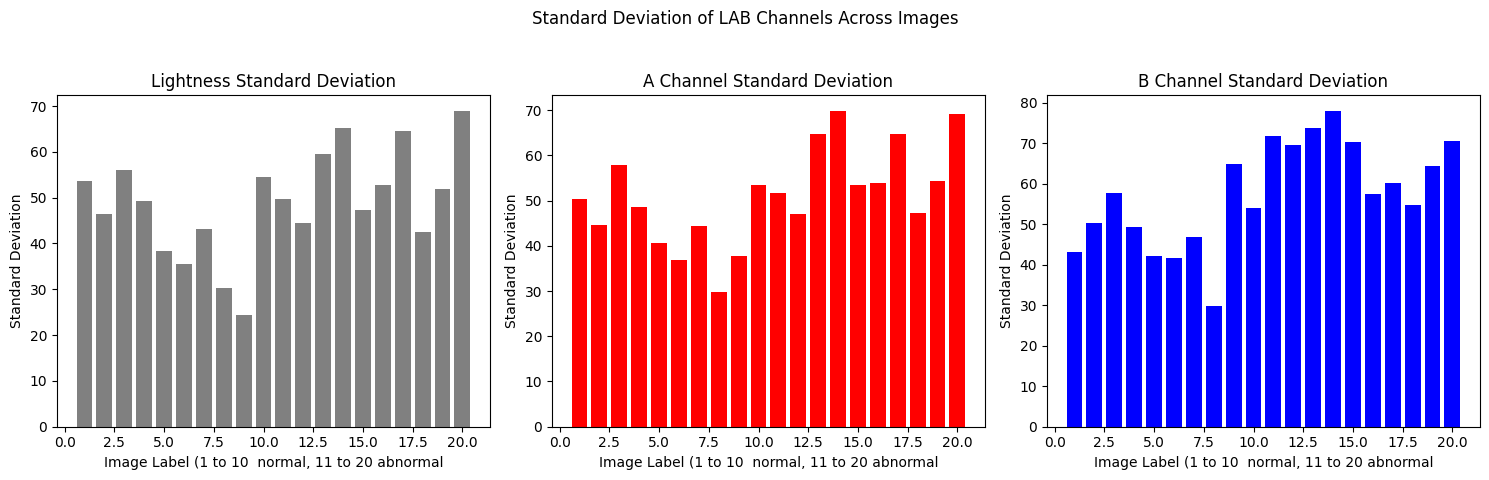

In [16]:


# take out standard deviation values
lightness_sds = [result['Lightness Standard Deviation'] for result in biomarkers_results]
a_channel_sds = [result['A Channel Standard Deviation'] for result in biomarkers_results]
b_channel_sds = [result['B Channel Standard Deviation'] for result in biomarkers_results]


# labels 
image_labels = list(range(1, len(biomarkers_results) + 1))

# set up the plotting
fig, axes = plt.subplots(1,  3, figsize=(15, 5)) 
fig.suptitle('Standard Deviation of LAB Channels Across Images')


# plot L channel sd
axes[0].bar(image_labels, lightness_sds, color='gray')
axes[0].set_title('Lightness Standard Deviation')
axes[0].set_xlabel('Image Label (1 to 10  normal, 11 to 20 abnormal')
axes[0].set_ylabel('Standard Deviation')

# A channel sd
axes[1].bar(image_labels, a_channel_sds, color='red')
axes[1].set_title('A Channel Standard Deviation')
axes[1].set_xlabel('Image Label (1 to 10  normal, 11 to 20 abnormal')
axes[1].set_ylabel('Standard Deviation')

# B channel sd
axes[2].bar(image_labels, b_channel_sds, color='blue')
axes[2].set_title('B Channel Standard Deviation')
axes[2].set_xlabel('Image Label (1 to 10  normal, 11 to 20 abnormal')
axes[2].set_ylabel('Standard Deviation')

# adjust layout 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## prepare data for training, validation, and testing and building a Neural Network 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# take out biomarker values into an array
features = np.array([
    [bm['Lightness Standard Deviation'], bm['A Channel Standard Deviation'], bm['B Channel Standard Deviation']]
    for bm in biomarkers_results
])
# 0 for 'normal' and 1 for 'abnormal'
labels = np.array([0]*10 + [1]*10)

# normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# split training and testing
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)











def create_deep_model(input_dim):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(input_dim,),
                              kernel_regularizer=regularizers.L2(0.05)),  # input layer
        tf.keras.layers.Dense(16, activation='relu',
                              kernel_regularizer=regularizers.L2(0.05)),
        tf.keras.layers.Dense(16, activation='relu',
                              kernel_regularizer=regularizers.L2(0.05)),  # additional hidden layer
        tf.keras.layers.Dropout(0.5),  # drop layer to avoid overfitting
        tf.keras.layers.Dense(8, activation='relu',
                              kernel_regularizer=regularizers.L2(0.05)),
        tf.keras.layers.Dense(1, activation='sigmoid')  # sigmoid for classification
    ])
    model.summary()  
    return model


model = create_deep_model(X_train.shape[1])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]




/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_140 (Dense)               │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Print results
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Accuracy: 0.5


/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## train and validate

In [19]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=5,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.3583 - loss: 3.2480 - val_accuracy: 0.0000e+00 - val_loss: 3.2128
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4833 - loss: 3.0785 - val_accuracy: 0.0000e+00 - val_loss: 3.1487
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5167 - loss: 3.2169 - val_accuracy: 0.0000e+00 - val_loss: 3.0843
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2250 - loss: 3.1198 - val_accuracy: 0.2500 - val_loss: 3.0238
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5917 - loss: 2.9733 - val_accuracy: 0.2500 - val_loss: 2.9673
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5667 - loss: 2.9049 - val_accuracy: 0.5000 - val_loss: 2.9125
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 2.9673 - val_accuracy: 0.5000 - val_loss: 2.8594
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4083 - loss: 2.9114 - val_accuracy: 0.5000 - val_

## Test the model on the test set

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 1.5695
Test Loss: 1.5695441961288452
Test Accuracy: 0.5


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities or class labels
predictions = model.predict(X_test)

# convert probabilities to binary class labels since the output layer is sigmoid
predicted_classes = (predictions > 0.5).astype(int)

# confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, predicted_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
 [[2 0]
 [2 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/landrytun/anaconda3/envs/med/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

[0. 0. 0. 1.] [0.  0.5 1.  1. ] [       inf 0.49066392 0.44574544 0.4350367 ]


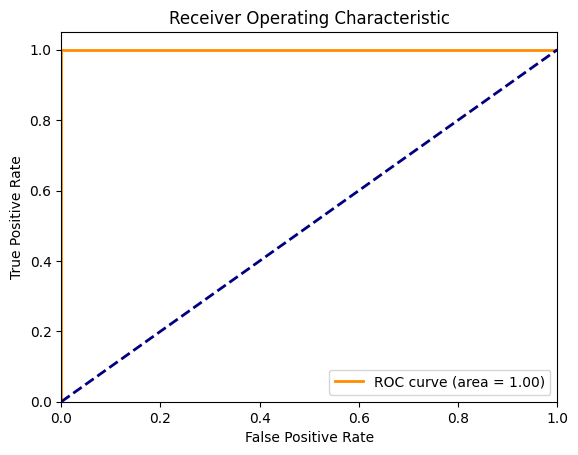

In [22]:
from sklearn.metrics import roc_curve, auc


# calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
print(fpr,tpr,thresholds)
roc_auc = auc(fpr, tpr)

# plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Post estimation
Face land mark - google
